![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- You can check “Meta” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
project_path= "/content/drive/My Drive/Colab Notebooks/R7-DL-CNN/"

In [5]:
!pip install rarfile

In [ ]:
#!pip install pyunpack
#from pyunpack import Archive

In [6]:
#Project notebook= Project 2 - Computer Vision - German Traffic Signs/
#dataset = 'Data - German Traffic Sign Recognition.rar'
import rarfile
with rarfile.RarFile(project_path+'Data - German Traffic Sign Recognition.rar','r') as r:
  r.extractall()

In [9]:
#Check how data is organized
!ls -l '/Data - German Traffic Sign Recognition'

ls: cannot access '/Data - German Traffic Sign Recognition': No such file or directory


### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in validation

In [7]:
import tensorflow as tf

In [8]:
#Define some parameters
img_size = 128
img_depth = 128

In [9]:
#ImageDataGenerator declaration with 25% data as test (75% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.25)

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [10]:
#Build training generator. 
train_generator = img_generator.flow_from_directory('./Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    subset='training',
                                                    batch_size=64)


Found 22124 images belonging to 33 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [11]:
#Build test generator
test_generator = img_generator.flow_from_directory('./Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition/Train',
                                                   target_size=(img_size, img_size),                                                   
                                                   subset='validation',
                                                   batch_size=64)

Found 7364 images belonging to 33 classes.


In [12]:
#Lets check the features (images) and Labels (flower class) returned by ImageDataGenerator
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (64, 128, 128, 3)
Actual labels shape (64, 33)


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [13]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model =tf.keras.models.Sequential()

'''#Different layers to be used in model
Batch_norm = tf.keras.layers.BatchNormalization(input_shape=(60,60,3,))
Con2D = tf.keras.layers.Convolution2D(64, kernel_size=(3,3), activation='relu', padding='same')
MaxPool = tf.keras.layers.MaxPool2D(pool_size=(2,2)
middle_dense_layer = tf.keras.layers.Dense(4096, activation='relu')
Output_dense_layer= tf.keras.layers.Dense(33, activation='softmax') # 33 because 33 classes/labels are there.
flatten = tf.keras.layers.Flatten()
Dropout = tf.keras.layers.Dropout(0.25)
l1=tf.keras.layers.Dense()'''

"#Different layers to be used in model\nBatch_norm = tf.keras.layers.BatchNormalization(input_shape=(60,60,3,))\nCon2D = tf.keras.layers.Convolution2D(64, kernel_size=(3,3), activation='relu', padding='same')\nMaxPool = tf.keras.layers.MaxPool2D(pool_size=(2,2)\nmiddle_dense_layer = tf.keras.layers.Dense(4096, activation='relu')\nOutput_dense_layer= tf.keras.layers.Dense(33, activation='softmax') # 33 because 33 classes/labels are there.\nflatten = tf.keras.layers.Flatten()\nDropout = tf.keras.layers.Dropout(0.25)\nl1=tf.keras.layers.Dense()"

In [14]:
#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))
#Add Output Layer
model.add(tf.keras.layers.Dense(33, activation='softmax'))


### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [15]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Get model summary (2 Marks)

In [16]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       7

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [17]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('german_traffic_sign.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [28]:
model.fit_generator(train_generator,
                    epochs=100,
                    steps_per_epoch= 2939//100,  #Number of training images//batch_size
                    validation_data=test_generator,
                    validation_steps = 7364//100, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 2.7318 - accuracy: 0.2101
Epoch 00001: val_accuracy improved from -inf to 0.04076, saving model to german_traffic_sign.h5
29/29 [==============================] - 44s 2s/step - loss: 2.7318 - accuracy: 0.2101 - val_loss: 25.8632 - val_accuracy: 0.0408
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 2.5657 - accuracy: 0.2645
Epoch 00002: val_accuracy improved from 0.04076 to 0.07717, saving model to german_traffic_sign.h5
29/29 [==============================] - 45s 2s/step - loss: 2.5657 - accuracy: 0.2645 - val_loss: 15.0325 - val_accuracy: 0.0772
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 2.5284 - accuracy: 0.2672
Epoch 00003: val_accuracy did not improve from 0.07717
29/29 [==============================] - 41s 1s/step - loss: 2.5284 - accuracy: 0.2672 - val_loss: 8.8289 - val_accuracy: 0.0734
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 2.4678 

Model gives a validation score of 89.65 % at 99th epoch and for batch size of 100 records

In [19]:
history=model.fit_generator(train_generator,
                    epochs=100,
                    steps_per_epoch= 2939//75,  #Number of training images//batch_size
                    validation_data=test_generator,
                    validation_steps = 7364//75, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 8.7624 - accuracy: 0.0942
Epoch 00001: val_accuracy improved from -inf to 0.03157, saving model to german_traffic_sign.h5
39/39 [==============================] - 45s 1s/step - loss: 8.7624 - accuracy: 0.0942 - val_loss: 493.6534 - val_accuracy: 0.0316
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 3.0347 - accuracy: 0.1620
Epoch 00002: val_accuracy did not improve from 0.03157
39/39 [==============================] - 43s 1s/step - loss: 3.0347 - accuracy: 0.1620 - val_loss: 4.4449 - val_accuracy: 0.0316
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 2.7945 - accuracy: 0.2051
Epoch 00003: val_accuracy improved from 0.03157 to 0.05517, saving model to german_traffic_sign.h5
39/39 [==============================] - 45s 1s/step - loss: 2.7945 - accuracy: 0.2051 - val_loss: 4.0581 - val_accuracy: 0.0552


Model gives a validation score of 95.48 % at 86th epoch and for batch size of 75 records. It is observed that validation accuracy varies even after running the model with same hyperparameters.

In [20]:
model.fit_generator(train_generator,
                    epochs=100,
                    steps_per_epoch= 2939//70,  #Number of training images//batch_size
                    validation_data=test_generator,
                    validation_steps = 7364//70, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
41/41 [==============================] - ETA: 0s - loss: 10.1780 - accuracy: 0.1041
Epoch 00001: val_accuracy improved from -inf to 0.04866, saving model to german_traffic_sign.h5
41/41 [==============================] - 45s 1s/step - loss: 10.1780 - accuracy: 0.1041 - val_loss: 1915.4955 - val_accuracy: 0.0487
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 2.9468 - accuracy: 0.1874
Epoch 00002: val_accuracy did not improve from 0.04866
41/41 [==============================] - 41s 991ms/step - loss: 2.9468 - accuracy: 0.1874 - val_loss: 14.2653 - val_accuracy: 0.0473
Epoch 3/100
41/41 [==============================] - ETA: 0s - loss: 2.6618 - accuracy: 0.2462
Epoch 00003: val_accuracy improved from 0.04866 to 0.05893, saving model to german_traffic_sign.h5
41/41 [==============================] - 43s 1s/step - loss: 2.6618 - accuracy: 0.2462 - val_loss: 8.6696 - val_accuracy: 

Out of 3 models best validation accuracy achieved is 95.% for 100 epochs with batch size of 75.

### Draw plots (3 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

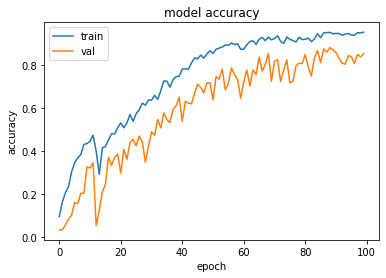

In [20]:
#Drawing plots for the model with highest validation accuracy with bactch size 75
from matplotlib import pyplot
'''acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']'''

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

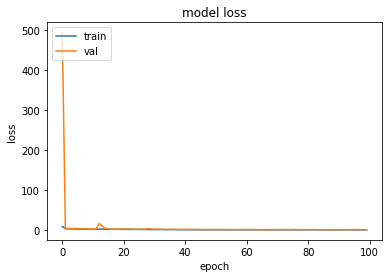

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()